# Чтение и запись данных

In [2]:
import pandas as pd

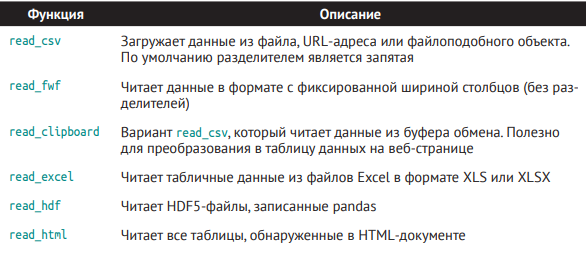

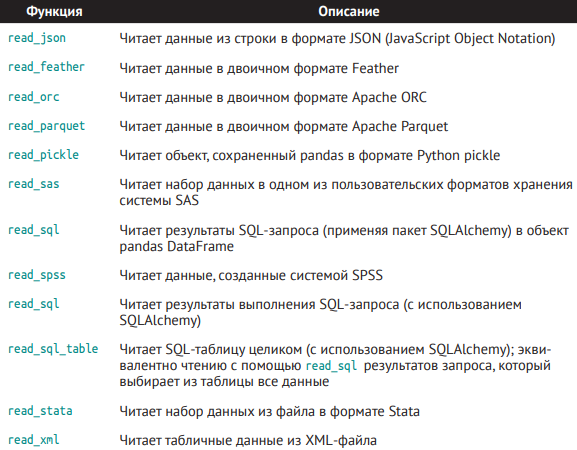

## Чтение текстовых файлов

In [3]:
# чтение файла csv, разделенного запятыми
data = pd.read_csv("train.csv") 
# path = 'D:\My Jupyter Notebook\Datasets\iris.csv'

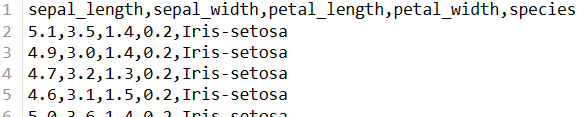

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### читать грязные данные не всегда приятно, для этого pd.read_csv использует множество аргументов
- sep='..' разделитель полей в строке для записи в датафрейм
- na_values=[..] значения, которые помечаются как NaN
- keep_default_na=True - использовать ли по умолчанию маркеры NaN
- skiprows =[ ] начальные строки, которые нужно проигнорировать при чтении данных

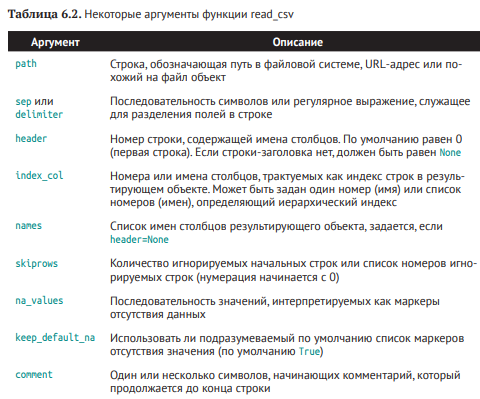
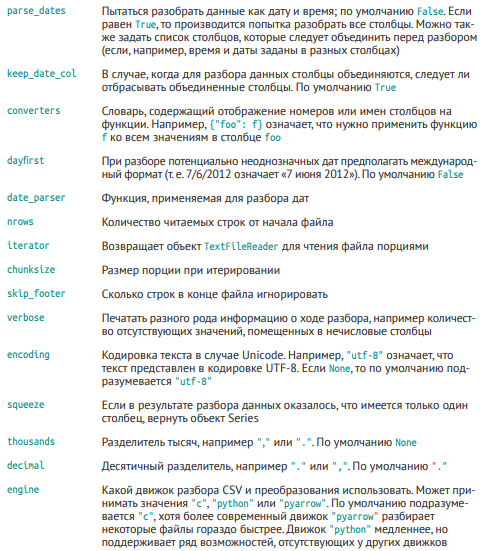

## Чтение текстовых файлов порциями

In [5]:
pd.options.display.max_rows = 5  # просим pandas ОТОБРАЖАТЬ меньше данных

In [6]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
# чтобы прочитать не весь файл, используем параметр nrows
data = pd.read_csv('train.csv',nrows=50)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


In [17]:
# Для чтения файла порциями задайте с помощью параметра chunksize размер порции в строках
chunker1 = pd.read_csv('train.csv', chunksize=300)
chunker1  # объект TextParser

In [18]:
for chunk in chunker1:
    data = chunk   # вырывает датасет по размеру чанка (читает порциями)
    print(data['Embarked'].value_counts())   # проводятся какие то действия 

S    216
C     54
Q     29
Name: Embarked, dtype: int64
S    212
C     63
Q     25
Name: Embarked, dtype: int64
S    216
C     51
Q     23
Name: Embarked, dtype: int64


In [20]:
chunker2 = pd.read_csv('train.csv',chunksize=30)
chunker2.get_chunk(10)  # получение произвольного куска данных (датасета)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...,...
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
data = pd.read_csv('train.csv')
data[1:7]  # nrows = 5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
pd.options.display.max_rows = 10   # изменим, чтобы видеть побольше
data

### Вывод данных в текстовом формате

In [ ]:
data.to_csv()

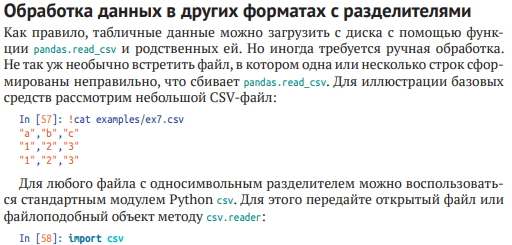

## Данные в формате JSON
pd.read_json()